<a href="https://colab.research.google.com/github/ArturoFinpytech/Python/blob/main/3.%20Proyectos_practicos/3_Aplicaciones_Reales_de_NumPy_y_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introducción Aplicaciones Reales: Proyectos Prácticos con Python**

En esta sección, nos enfocaremos en aplicar y expandir tus conocimientos y habilidades en análisis de datos y visualización a través de una serie de proyectos prácticos. Estos ejercicios están diseñados para aumentar en complejidad y te desafiarán a utilizar las herramientas y técnicas aprendidas de manera integrada y creativa.

# **2. Proyectos.**

## **2.1. Proyecto 1: Análisis de Datos de Ventas**

Para desarrollar el Proyecto 1 sobre el análisis de datos de ventas, vamos a simular un conjunto de datos de ventas que incluye la fecha de venta, categoría del producto, cantidad vendida, precio y cliente. Este ejemplo te guiará a través de cada una de las tareas propuestas, desde la carga y limpieza de los datos hasta la identificación de tendencias, productos más vendidos y clientes más importantes.

### **2.2.1. Simulación del Conjunto de Datos**

Para efectos de este ejemplo, vamos a crear un conjunto de datos simulado utilizando Pandas y NumPy:


#### **2.2.1.1 Importación de Bibliotecas**

Se importan Pandas y NumPy, dos de las bibliotecas más populares para la manipulación de datos y cálculos numéricos en Python.

In [ ]:
import pandas as pd
import numpy as np


#### **2.2.1.2 Simulación del data frame**

El siguiente codigo nos ayudara a generar los datos necesarios para iniciar el proyecto.

In [ ]:
# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Fechas aleatorias dentro de un año
fechas = pd.date_range(start="2023-01-01", end="2023-12-31", periods=1000)

# Simulación de datos
datos = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoría': np.random.choice(['Electrónica', 'Ropa', 'Alimentos', 'Juguetes'], 1000),
    'Cantidad': np.random.randint(1, 10, 1000),
    'Precio': np.random.uniform(10, 500, 1000).round(2),
    'Cliente': np.random.choice(['Cliente A', 'Cliente B', 'Cliente C', 'Cliente D'], 1000)
}

df_ventas = pd.DataFrame(datos)


#### **2.2.1.3 Visualización del DataFrame.**

Para verificar que los datos se han creado correctamente, visualizamos las primeras filas del DataFrame.

**Desglose y Explicación:**


1. **df_ventas:**

Este es nuestro DataFrame que contiene todos los datos de ventas.

2. **.head():**

El punto seguido de head() es una función de Pandas que muestra las primeras 5 filas del DataFrame por defecto.

Esto es útil para ver una vista previa rápida de los datos y asegurarnos de que se han cargado correctamente.

3. **print():**

La función print() en Python se utiliza para mostrar información en la consola.



**Ejemplo Cotidiano:**

Imagina que tienes un cuaderno con una lista larga de nombres de estudiantes y sus calificaciones. Quieres ver los primeros 5 estudiantes para asegurarte de que todo está en orden. Abres el cuaderno y miras las primeras 5 filas de la lista. Eso es exactamente lo que hace df_ventas.head(), y print() muestra esa vista en tu pantalla.

In [ ]:
#En este caso, muestra las primeras 5 filas del DataFrame en la consola para que podamos visualizarlas.
print(df_ventas.head())


                          Fecha    Categoría  Cantidad  Precio    Cliente  \
0 2023-02-07 03:57:50.270270270  Electrónica         7   15.41  Cliente B   
1 2023-06-08 11:57:50.270270270  Electrónica         1  377.28  Cliente A   
2 2023-11-10 08:28:49.729729732    Alimentos         7  381.75  Cliente A   
3 2023-04-09 09:04:51.891891892     Juguetes         5  342.41  Cliente B   
4 2023-02-08 14:56:34.594594594  Electrónica         6  380.57  Cliente D   

       Mes  
0  2023-02  
1  2023-06  
2  2023-11  
3  2023-04  
4  2023-02  


### **2.2.2. Carga y Limpieza de los Datos.**

Ya que hemos creado el DataFrame, revisemos si hay datos faltantes y limpiemos los datos si es necesario.

Desglose y Explicación
df_ventas:

Este es nuestro DataFrame que contiene todos los datos de ventas.
.isnull():

El punto seguido de isnull() es una función de Pandas que verifica cada elemento del DataFrame y devuelve True si el valor es nulo (es decir, si falta un dato) y False si el valor no es nulo.
.sum():

Después de isnull(), usamos .sum(), que suma todos los valores True en cada columna del DataFrame. Como True se considera como 1 y False como 0, la suma nos da el número de valores nulos en cada columna.
print():

La función print() muestra los resultados en la consola. En este caso, muestra cuántos valores nulos hay en cada columna del DataFrame.
Ejemplo Cotidiano
Imagina que tienes una hoja de cálculo con información de empleados, pero algunos campos están vacíos. Quieres saber cuántos campos vacíos hay en cada columna (por ejemplo, cuántos empleados no tienen número de teléfono registrado). isnull().sum() cuenta esos campos vacíos y print() te muestra los resultados.

In [ ]:
# Verificación de datos faltantes
print(df_ventas.isnull().sum())

# Tipo de datos
print(df_ventas.dtypes)


Fecha        0
Categoría    0
Cantidad     0
Precio       0
Cliente      0
Mes          0
dtype: int64
Fecha        datetime64[ns]
Categoría            object
Cantidad              int64
Precio              float64
Cliente              object
Mes               period[M]
dtype: object


### **2.2.3. Análisis Exploratorio**
Realizaremos un análisis exploratorio básico para entender las características principales del conjunto de datos.

### **2.2.3.1 Resumen Estadístico de los Datos**
Utilizamos .describe() para obtener estadísticas descriptivas de los datos numéricos.

In [ ]:
resumen_estadístico = df_ventas.describe()
print(resumen_estadístico)


#### **2.2.3.2 Cantidad de Ventas por Categoría**
Contamos la cantidad de ventas por categoría de producto.

In [ ]:
ventas_por_categoría = df_ventas['Categoría'].value_counts()
print(ventas_por_categoría)


Categoría
Electrónica    264
Alimentos      261
Ropa           261
Juguetes       214
Name: count, dtype: int64


### **2.2.4. Visualización de Tendencias de Ventas**

#### **2.2.4.1 Agregar Columna 'Mes'**
Extraemos el mes de cada fecha de venta para analizar las tendencias mensuales.

In [ ]:
df_ventas['Mes'] = df_ventas['Fecha'].dt.to_period('M')


#### **2.2.4.2 Agrupación de Ventas por Mes.**

Sumamos la cantidad vendida por mes.

In [ ]:
ventas_por_mes = df_ventas.groupby('Mes')['Cantidad'].sum()


#### **2.2.4.3 Crear Gráfico de Ventas Mensuales**
Utilizamos Matplotlib para visualizar las ventas mensuales.

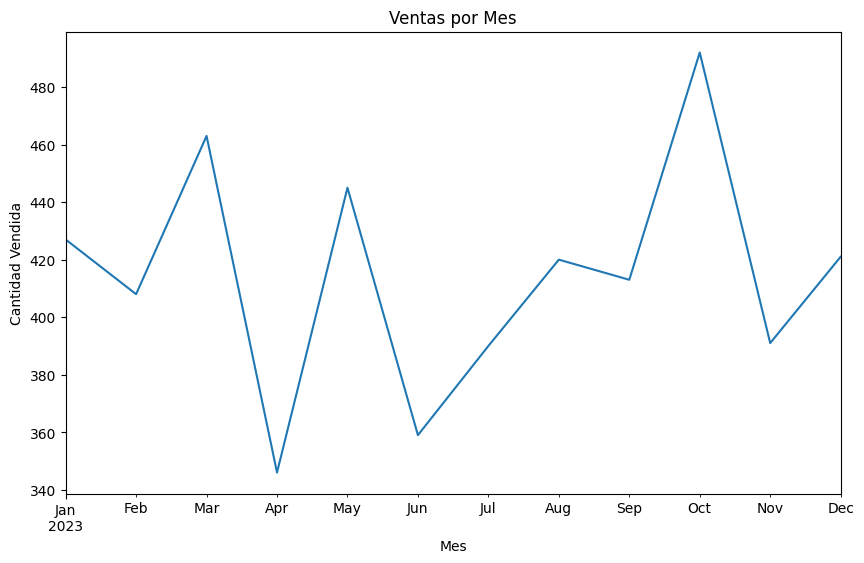

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ventas_por_mes.plot(title='Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.show()


### **2.2.5. Identificación de Productos y Clientes Importantes**

#### **2.2.5.1 Productos Más Vendidos**
Agrupamos los datos por categoría y sumamos las cantidades vendidas para identificar los productos más vendidos.